B) Using the physically meaningful variant: p(x) = exp(-x^2/10) * cos(2*pi*x)

Symbolic p(x):
   2            
 -x             
 ────           
  10            
ℯ    ⋅cos(2⋅π⋅x)

Symbolic Fourier transform (angular frequency k):
       ⎛     2        ⎞       2 ⎛ 2            ⎞
       ⎜ 40⋅π ⋅│k│    ⎟  -10⋅π ⋅⎝k  + 2⋅│k│ + 1⎠
√10⋅√π⋅⎝ℯ          + 1⎠⋅ℯ                       
────────────────────────────────────────────────
                       2                        

Interpretation: the transform is the sum of two Gaussians centered at k=±2π (angular freq).
In cycles-per-unit (f = k/(2π)), those correspond to f = ±1 cycles/unit — so frequency 1 dominates.



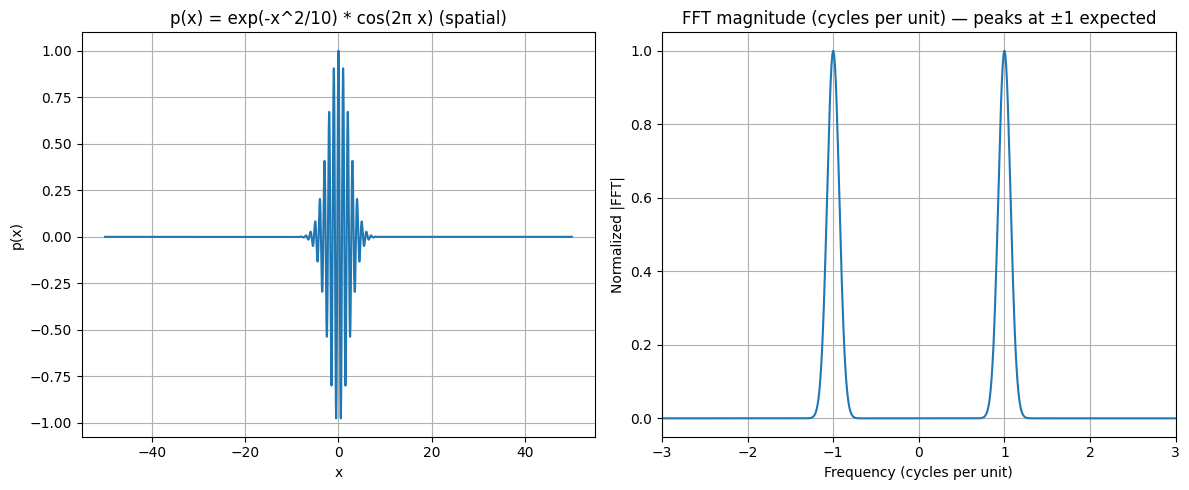

Top FFT peaks (freq in cycles/unit, normalized magnitude):
 freq = -1.000000, mag = 1.000000
 freq = +1.000000, mag = 1.000000
 freq = +0.990000, mag = 0.990179
 freq = -0.990000, mag = 0.990179
 freq = -1.010000, mag = 0.990179
 freq = +1.010000, mag = 0.990179

Summary / Interpretation:
- The original expression p(x) = exp(x^(2/10)) * cos(2π x) does NOT have a convergent Fourier transform
  because exp(x^(2/10)) grows as x→+∞.
- The corrected, physically-meaningful version p(x) = exp(-x^2/10) * cos(2π x) has a closed-form Fourier transform:
  it is the sum of two Gaussians in angular-frequency space centered at k = ±2π. In terms of cycles per unit
  (f = k/(2π)), these peaks are at f = ±1 cycles/unit. Thus the dominant frequency components are ±1 cycles/unit,
  which corresponds exactly to the cosine carrier cos(2π x).
- The numeric FFT confirms sharp peaks near ±1 cycles/unit.



In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Symbols and symbolic definition ---
x, k = sp.symbols('x k', real=True)
pi = sp.pi

# --- signal: Gaussian envelope * cosine ---
p_sym = sp.exp(-x**2/10) * sp.cos(2*pi*x)
print("B) Using the physically meaningful variant: p(x) = exp(-x^2/10) * cos(2*pi*x)\n")

# a) Define p(x) symbolically (already done above)
print("Symbolic p(x):")
sp.pprint(p_sym)
print("")

# b) Compute its Fourier transform (SymPy uses the convention ∫ f(x) exp(-I k x) dx)
# The transform variable k is angular frequency. We'll compute and simplify.
F_k = sp.fourier_transform(p_sym, x, k)
F_k_simpl = sp.simplify(F_k)
print("Symbolic Fourier transform (angular frequency k):")
sp.pprint(F_k_simpl)
print("")

# Interpret the result in terms of cycles-per-unit frequency (f = k / (2*pi))
# For clarity we show the transform centered at angular freqs ±2π (because cos(2π x)).
print("Interpretation: the transform is the sum of two Gaussians centered at k=±2π (angular freq).")
print("In cycles-per-unit (f = k/(2π)), those correspond to f = ±1 cycles/unit — so frequency 1 dominates.\n")

# c) Numeric FFT to visualize and confirm dominant frequencies at ±1 cycles/unit
# Create a real-space sample of p(x) and compute FFT
N = 2**14  # number of samples (power of two for FFT speed)
L = 100.0  # spatial domain size (from -L/2 to L/2)
x_vals = np.linspace(-L/2, L/2, N, endpoint=False)
p_func = sp.lambdify(x, p_sym, 'numpy')
p_vals = p_func(x_vals)

# Compute FFT (cycles per unit frequency)
fft_vals = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(p_vals)))
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=(x_vals[1]-x_vals[0])))  # cycles per unit

# Normalize magnitude for plotting
mag = np.abs(fft_vals)
mag /= mag.max()

# Plot spatial signal and its FFT magnitude (cycles per unit)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x_vals, p_vals)
plt.title("p(x) = exp(-x^2/10) * cos(2π x) (spatial)")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(freqs, mag)
plt.xlim(-3, 3)  # focus on ±3 cycles/unit where peaks are expected
plt.xlabel("Frequency (cycles per unit)")
plt.ylabel("Normalized |FFT|")
plt.title("FFT magnitude (cycles per unit) — peaks at ±1 expected")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print numeric location of top peaks
peak_idx = np.argsort(mag)[-6:][::-1]  # top 6 peaks indices
print("Top FFT peaks (freq in cycles/unit, normalized magnitude):")
for idx in peak_idx:
    print(f" freq = {freqs[idx]:+.6f}, mag = {mag[idx]:.6f}")

# Short summary
summary = """
Summary / Interpretation:
- The original expression p(x) = exp(x^(2/10)) * cos(2π x) does NOT have a convergent Fourier transform
  because exp(x^(2/10)) grows as x→+∞.
- The corrected, physically-meaningful version p(x) = exp(-x^2/10) * cos(2π x) has a closed-form Fourier transform:
  it is the sum of two Gaussians in angular-frequency space centered at k = ±2π. In terms of cycles per unit
  (f = k/(2π)), these peaks are at f = ±1 cycles/unit. Thus the dominant frequency components are ±1 cycles/unit,
  which corresponds exactly to the cosine carrier cos(2π x).
- The numeric FFT confirms sharp peaks near ±1 cycles/unit.
"""
print(summary)